# libs

In [1]:
import os
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import pickle
import chess
import chess.pgn
import chess.svg

from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

from IPython.display import Image, SVG, display

# funções

## constantes

In [2]:
DICT1 = {'p':-15,'r':-75,'n':-45,'b':-45,'q':-100,'k':-150,'.':0,'K':150,'Q':100,'B':45,'N':45,'R':75,'P':15}

DICT2 = {-15:(chess.PAWN, chess.BLACK),
         -75:(chess.ROOK, chess.BLACK), 
         -45:(chess.KNIGHT, chess.BLACK), 
         -45:(chess.BISHOP, chess.BLACK), 
         -100:(chess.QUEEN, chess.BLACK), 
         -150:(chess.KING, chess.BLACK),
          0:'.',
         150:(chess.KING, chess.WHITE),
         100:(chess.QUEEN, chess.WHITE),
         45:(chess.BISHOP, chess.WHITE),
         45:(chess.KNIGHT, chess.WHITE),
         75:(chess.ROOK, chess.WHITE),
         15:(chess.PAWN, chess.WHITE)}

## `symbol2value`

In [3]:
def symbol2value(list):
    for i, v in enumerate(list):
        if v in DICT1:
            list[i] = DICT1[v]
    return list

## `list2piece`

In [4]:
def list2piece(list):
    for i, v in enumerate(list):
        if v in DICT2:
            list[i] = DICT2[v]
    return list

## `ceil_to_tens`

In [5]:
def ceil_to_tens(x):
    return int(ceil(x / 10.0)) * 10

## `game2list`

In [6]:
def game2list(g, tag='_tag', path='_path'):
    matrix = list()
    board  = g.board()
    meta   = dict(g.headers)
    print(meta)
    
    w_id = '{}'.format( meta['White'].split(',')[0].lower().replace(' ', '_') )
    b_id = '{}'.format( meta['Black'].split(',')[0].lower().replace(' ', '_') )
    
    players = { 'W' : w_id, 'B': b_id }
    
    
    turn_color = lambda s: 'W' if s == True else 'B'
    turn_count = 0
    game_path  = '{}/{}'.format(path, tag)
    
    if not os.path.exists(game_path):
        os.makedirs(game_path)
    
    for m in g.mainline_moves():
        with open('{}/chess_{}.svg'.format( game_path, str(turn_count).zfill(3) ), 'w') as img:
            img.write(chess.svg.board(board=board))

        #s      = str(board)
        state  = [str(board.piece_at(i)) if board.piece_at(i) != None else '.' for i in range(64) ]
        target = [ str(board.piece_at(m.from_square)), m.from_square, m.to_square ]
        #matrix.append( symbol2value(state + target) )
        _num_state   = symbol2value(state)
        _num_target  = symbol2value(target)
        _num_move    = {'moved_piece': _num_target[0],
                        'moved_from' : _num_target[1],
                        'moved_to'   : _num_target[2]}
        matrix.append( { 'player'          : players[turn_color(board.turn)],
                         'full_move_count' : board.fullmove_number,
                         'turn_count'      : str(turn_count).zfill(3),
                         'turn_color'      : turn_color(board.turn),
                         'state'           : _num_state,
                         'is_checkmate'    : board.is_checkmate(), 
                         'is_stalemate'    : board.is_stalemate(),
                         'is_castling'     : board.is_castling(m), 
                         'has_castling'    : board.has_castling_rights(board.turn),
                         'move'            : _num_move
                         } )
        board.push(m)
        turn_count += 1 
    return matrix

# exemplo: "Botvinnik Mem Match - 2001.12.01"

In [7]:
pgn   = open("xadrez/data/Kasparov.pgn")
games = list()

while len(games) < 2000:
    try:
        games.append(chess.pgn.read_game(pgn))
    except UnicodeDecodeError:
        None

In [8]:
black = [i for i in games if 'Kasparov' in i.headers['Black']]
white = [i for i in games if 'Kasparov' in i.headers['White']]

print('B: ', len(black))
print('W: ', len(white))

B:  875
W:  1123


In [9]:
i       = 777
alias   = 'Kasparov'
nametag = alias.lower() 
sampleb = black[i]
print(sampleb)

[Event "Botvinnik Mem Match"]
[Site "Moscow RUS"]
[Date "2001.12.01"]
[Round "1"]
[White "Kramnik,V"]
[Black "Kasparov,G"]
[Result "1/2-1/2"]
[BlackElo "2838"]
[ECO "D27"]
[WhiteElo "2809"]

1. d4 d5 2. c4 dxc4 3. Nf3 e6 4. e3 a6 5. Bxc4 c5 6. O-O Nf6 7. dxc5 Qxd1 8. Rxd1 Bxc5 9. Nbd2 O-O 10. Be2 Rd8 11. Ne5 Be7 12. b3 Nd5 13. Bb2 f6 14. Nd3 Nc6 15. e4 Nb6 16. e5 f5 17. Rac1 Bd7 18. Nf3 1/2-1/2


     1. d4   True
    1...d5  False
     2. c4   True
  2...dxc4  False
    3. Nf3   True
    3...e6  False
     4. e3   True
    4...a6  False
   5. Bxc4   True
    5...c5  False
    6. O-O   True
   6...Nf6  False
   7. dxc5   True
  7...Qxd1  False
   8. Rxd1   True
  8...Bxc5  False
   9. Nbd2   True
   9...O-O  False
   10. Be2   True
  10...Rd8  False
   11. Ne5   True
  11...Be7  False
    12. b3   True
  12...Nd5  False
   13. Bb2   True
   13...f6  False
   14. Nd3   True
  14...Nc6  False
    15. e4   True
  15...Nb6  False
    16. e5   True
   16...f5  False
  17. Rac1   True
  17...Bd7  False
   18. Nf3   True


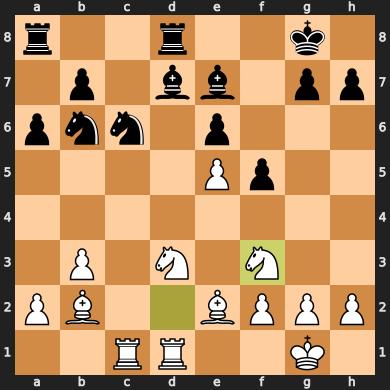

In [10]:
board = sampleb.board()
for m in sampleb.mainline_moves():
    print('{:>10} {:>6}'.format( board.variation_san([m]), str(board.turn)))
    board.push(m)
board

## tratamento

In [11]:
meta_ = dict(sampleb.headers)
id_   = '{}{}'.format( nametag, "{0:#0{1}x}".format(i,5) )

if nametag in meta_['White'].lower():
    _id = '{}{}'.format( meta_['Black'].split(',')[0].lower().replace(' ', '_'), "{0:#0{1}x}".format(i,5) )
elif nametag in meta_['Black'].lower():
    _id = '{}{}'.format( meta_['White'].split(',')[0].lower().replace(' ', '_'), "{0:#0{1}x}".format(i,5) )
else:
    print('INCONSISTENCY FOUND!')

In [12]:
print(id_, _id)

kasparov0x309 kramnik0x309


In [13]:
data = game2list(sampleb, id_, 'xadrez/tmp_game_img')

{'Event': 'Botvinnik Mem Match', 'Site': 'Moscow RUS', 'Date': '2001.12.01', 'Round': '1', 'White': 'Kramnik,V', 'Black': 'Kasparov,G', 'Result': '1/2-1/2', 'BlackElo': '2838', 'ECO': 'D27', 'WhiteElo': '2809'}


## dataframe

In [14]:
df    = pd.DataFrame(data)
move_ = df[['turn_count', 'move']].copy()
df    = pd.concat([ df, pd.DataFrame(list(move_['move'])) ], axis=1 )
df['id'] = id_

df = df[['id',
         'player', 
         'full_move_count', 
         'turn_count', 
         'turn_color',
         'has_castling', 
         'is_castling', 
         'is_checkmate', 
         'is_stalemate', 
         'state', 
         'moved_piece', 
         'moved_from', 
         'moved_to']]

In [15]:
df.head()

,id,player,full_move_count,turn_count,turn_color,has_castling,is_castling,is_checkmate,is_stalemate,state,moved_piece,moved_from,moved_to
0,kasparov0x309,kramnik,1,000,W,True,False,False,False,"[75, 45, 45, 100, 150, 45, 45, 75, 15, 15, 15,...",15,11,27
1,kasparov0x309,kasparov,1,001,B,True,False,False,False,"[75, 45, 45, 100, 150, 45, 45, 75, 15, 15, 15,...",-15,51,35
2,kasparov0x309,kramnik,2,002,W,True,False,False,False,"[75, 45, 45, 100, 150, 45, 45, 75, 15, 15, 15,...",15,10,26
3,kasparov0x309,kasparov,2,003,B,True,False,False,False,"[75, 45, 45, 100, 150, 45, 45, 75, 15, 15, 0, ...",-15,35,26
4,kasparov0x309,kramnik,3,004,W,True,False,False,False,"[75, 45, 45, 100, 150, 45, 45, 75, 15, 15, 0, ...",45,6,21


## representação matricial

In [16]:
# DICT1 = {'p':-25,'r':-75,'n':-45,'b':-45,'q':-100,'k':-150,'.':0,'K':150,'Q':100,'B':45,'N':45,'R':75,'P':25}

scaler = MinMaxScaler()
pesos_abs = np.array([0, 15, 45, 75, 100, 150]).reshape(-1, 1)
pesos_prc = np.round( scaler.fit_transform(pesos_abs), 4)

pesos_abs = pesos_abs.reshape(1,-1)[0]
pesos_prc = pesos_prc.reshape(1,-1)[0]

pesos_abs = np.append(pesos_abs, (-1)*pesos_abs)
pesos_prc = np.append(pesos_prc, (-1)*pesos_prc)

map_p    = {k:v for k,v in zip(pesos_abs, pesos_prc)}
# map_p[0] = 0.0

In [17]:
state_id = 1
state    = np.array(df.loc[state_id,'state'])
state8x8 = state.reshape(8,8)
state_sc = np.vectorize(map_p.get)(state8x8)

dataframe:


,id,player,full_move_count,turn_count,turn_color,has_castling,is_castling,is_checkmate,is_stalemate,state,moved_piece,moved_from,moved_to
0,kasparov0x309,kramnik,1,000,W,True,False,False,False,"[75, 45, 45, 100, 150, 45, 45, 75, 15, 15, 15,...",15,11,27



lista:
[  75   45   45  100  150   45   45   75   15   15   15    0   15   15
   15   15    0    0    0    0    0    0    0    0    0    0    0   15
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0  -15  -15  -15  -15  -15  -15  -15  -15
  -75  -45  -45 -100 -150  -45  -45  -75]

matriz:
de:    (1, 3)
para:  (3, 3)
vec:   [2 0]
[[  75   45   45  100  150   45   45   75]
 [  15   15   15    0   15   15   15   15]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0   15    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [ -15  -15  -15  -15  -15  -15  -15  -15]
 [ -75  -45  -45 -100 -150  -45  -45  -75]]
[[ 0.5     0.3     0.3     0.6667  1.      0.3     0.3     0.5   ]
 [ 0.1     0.1     0.1    -0.      0.1     0.1     0.1     0.1   ]
 [-0.     -0.     -0.     -0.     -0.     -0.     -0.     -0.    ]
 [-0.     -0.     -0.      0.1    -0.     -0.     -0.     -0.    ]
 [-

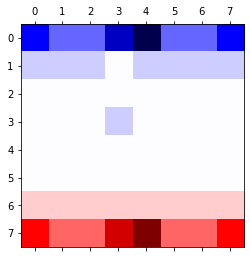

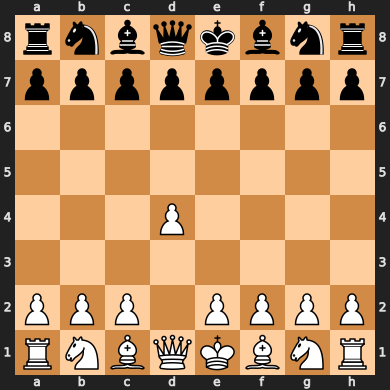

In [18]:
print("dataframe:")
df_ = df.loc[[state_id-1], :].copy()
display(df_)

print()
print("lista:")
print(state)

print()
print("matriz:")
vec_f = (np.unravel_index(df_['moved_from'], state8x8.shape)[0][0],
         np.unravel_index(df_['moved_from'], state8x8.shape)[1][0])
vec_t = (np.unravel_index(df_['moved_to'], state8x8.shape)[0][0],
         np.unravel_index(df_['moved_to'], state8x8.shape)[1][0])
print("de:   ",  vec_f)
print("para: ",  vec_t)
print("vec:  ",  np.subtract(vec_t, vec_f))

print(state8x8)
print(state_sc)
plt.matshow( state_sc, cmap='seismic_r' )
plt.show()

display(SVG(filename=rf'xadrez/tmp_game_img/kasparov0x309/chess_{str(state_id).zfill(3)}.svg'))

.